In [1]:
# Importing required libraries 
import pandas as pd 
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from excel file
data = pd.read_excel("1613779-Red_wine_.xlsx")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [3]:
data.count() # count of values

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1598
density                 1599
pH                      1598
sulphates               1599
alcohol                 1599
quality                 1598
dtype: int64

In [4]:
data.info() #Checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
data.isnull().sum() # Checking null values 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

### Treating null values

In [6]:
# Fetching those row(s) where there is/are missing values
data[data['total sulfur dioxide'].isna() | data['pH'].isna() | data['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


#### <i>Insight: The row at index 9, 123, 184 contains a missing value in the Quality, pH and total sulfur dioxide.</i><br><br>

#### You will have to choose what must be done here with the missing values - Omit them OR Impute them?

#### Since, we only have one missing value, getting rid of them seems harmless and the right thing to do, not to mention it's just easier.

In [7]:
data.dropna(inplace = True) #Dropping null values

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Observation 

Null Values treated

In [9]:
data.describe() # Checking mean and standard deviation of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [10]:
data # Final data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [11]:
data.dtypes # Checking data types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [12]:
#  check if data is balanced or imbalanced

data['quality'].value_counts()

5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

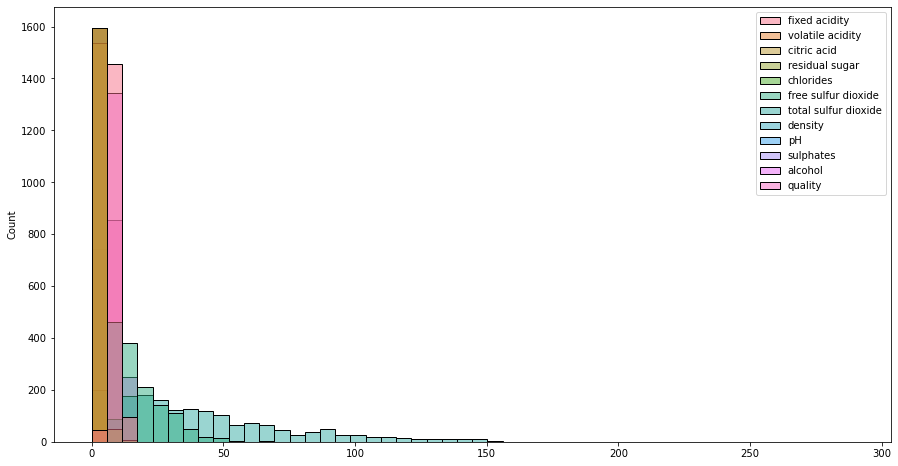

In [13]:
# Plotting a histogram to view how the 'Low' feature is laid out.

plt.figure(figsize = (15, 8))
sns.histplot(data = data, bins = 50)
plt.show()

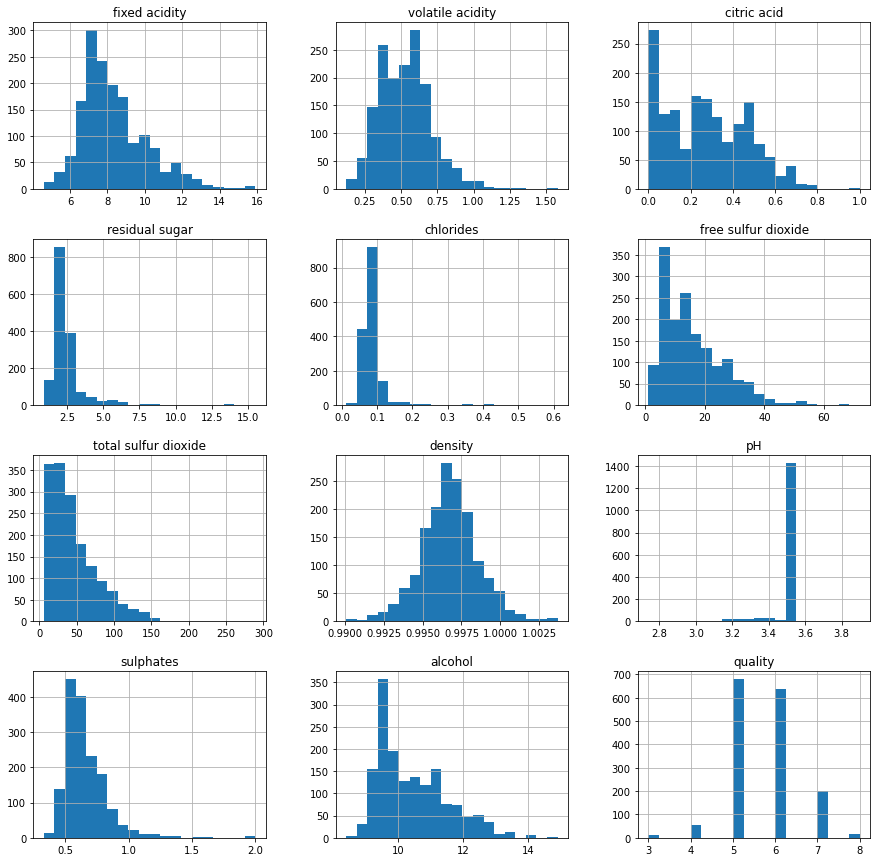

In [14]:
# Plotting a histogram to view how the 'Low' feature is laid out.

data.hist(bins=20,figsize=(15,15))
#plot showing
plt.show()

In [15]:
data.shape

(1596, 12)

In [16]:
data.corr() # Correaltion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255955,0.672203,0.115542,0.093517,-0.154348,-0.112605,0.668689,0.026958,0.183046,-0.062419,0.124090
volatile acidity,-0.255955,1.000000,-0.552080,0.002286,0.061452,-0.009960,0.076832,0.021761,-0.046243,-0.260504,-0.201591,-0.390616
citric acid,0.672203,-0.552080,1.000000,0.143201,0.203904,-0.061621,0.034873,0.365526,0.008324,0.312146,0.109062,0.226261
residual sugar,0.115542,0.002286,0.143201,1.000000,0.056236,0.187112,0.201120,0.355219,0.043099,0.004105,0.041798,0.015165
chlorides,0.093517,0.061452,0.203904,0.056236,1.000000,0.005456,0.047837,0.200860,-0.259456,0.371510,-0.221472,-0.129172
free sulfur dioxide,-0.154348,-0.009960,-0.061621,0.187112,0.005456,1.000000,0.668505,-0.021797,-0.025512,0.051200,-0.070222,-0.050656
total sulfur dioxide,-0.112605,0.076832,0.034873,0.201120,0.047837,0.668505,1.000000,0.070830,-0.162984,0.042082,-0.205951,-0.184857
density,0.668689,0.021761,0.365526,0.355219,0.200860,-0.021797,0.070830,1.000000,-0.037144,0.148561,-0.496244,-0.174567
pH,0.026958,-0.046243,0.008324,0.043099,-0.259456,-0.025512,-0.162984,-0.037144,1.000000,-0.260327,0.233510,0.133216
sulphates,0.183046,-0.260504,0.312146,0.004105,0.371510,0.051200,0.042082,0.148561,-0.260327,1.000000,0.092940,0.251798


In [17]:
data['pH']

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.52
1595    3.52
1596    3.52
1597    3.52
1598    3.52
Name: pH, Length: 1596, dtype: float64

<AxesSubplot:>

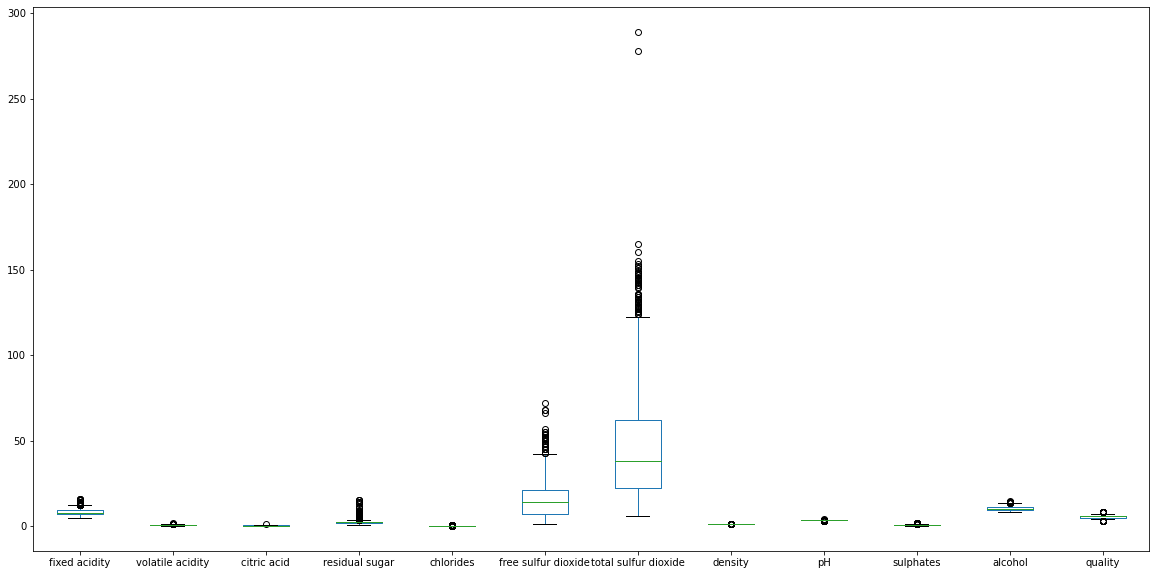

In [18]:
# Looking for outliers using boxplot from ---
# data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].plot(kind='box')



fig = plt.figure(figsize = (20,10))
data.boxplot(column=[name for name in list(data)], grid=False)



### Observation 

We used the boxplot for Checking the outliers in the data as you can see the different observation in the data are the outliers let's find outliers with inter quartile range rule---

In [19]:
def detect_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))

In [20]:
detect_outliers(data['quality'])# Location of the index of outliers

(array([ 264,  275,  387,  437,  452,  456,  478,  492,  495,  514,  585,
         687,  825,  829,  896, 1058, 1087, 1117, 1199, 1266, 1296, 1371,
        1400, 1446, 1466, 1475, 1502, 1546], dtype=int64),)

In [21]:
def Outliers(data):
    for feature in data.columns[:-1]:
        d = data[feature]
        iqr = d.quantile(0.75) - d.quantile(0.25)
        Min = d.quantile(0.25) - 1.5*iqr
        Max = d.quantile(0.75) + 1.5*iqr 
        outliers = data[(d > Max ) | ( d < Min )]
        p = outliers.groupby(by = 'quality').count().reset_index()
        print('Total outliers for ' + feature + " feature : " + str(outliers[feature].count()))
        
Outliers(data)

Total outliers for fixed acidity feature : 49
Total outliers for volatile acidity feature : 19
Total outliers for citric acid feature : 1
Total outliers for residual sugar feature : 154
Total outliers for chlorides feature : 112
Total outliers for free sulfur dioxide feature : 30
Total outliers for total sulfur dioxide feature : 55
Total outliers for density feature : 45
Total outliers for pH feature : 180
Total outliers for sulphates feature : 59
Total outliers for alcohol feature : 13


In [22]:
index = data['free sulfur dioxide'] > 0 
for feature in data[:-1]:
    d = data[feature]
    iqr = d.quantile(0.75) - d.quantile(0.25)
    Min = d.quantile(0.25) - 1.5*iqr
    Max = d.quantile(0.75) + 1.5*iqr 
    index = ((d <= Max) & (d >= Min)) & index 
    
new_data = data[index]

In [23]:
data.shape

(1596, 12)

In [24]:
new_data.shape

(1065, 12)

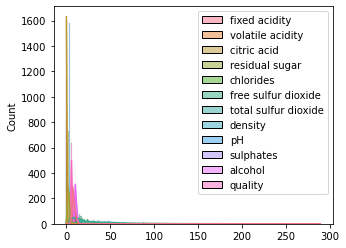

In [25]:
plt.figure(figsize = (5, 4))
sns.histplot(data = data, kde = True)
plt.show()

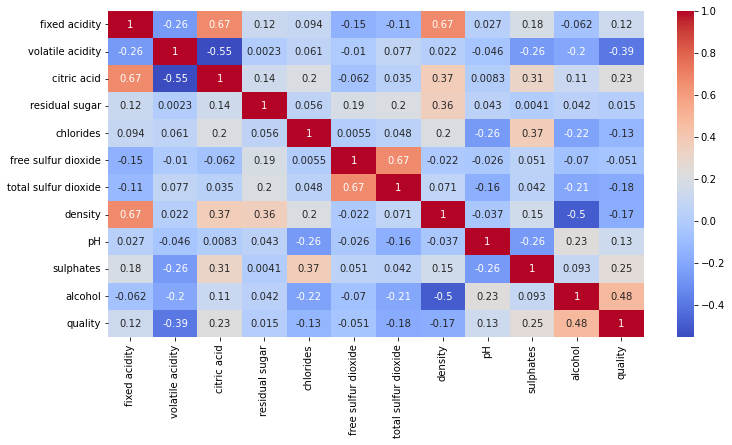

In [26]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11732\1328255430.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))


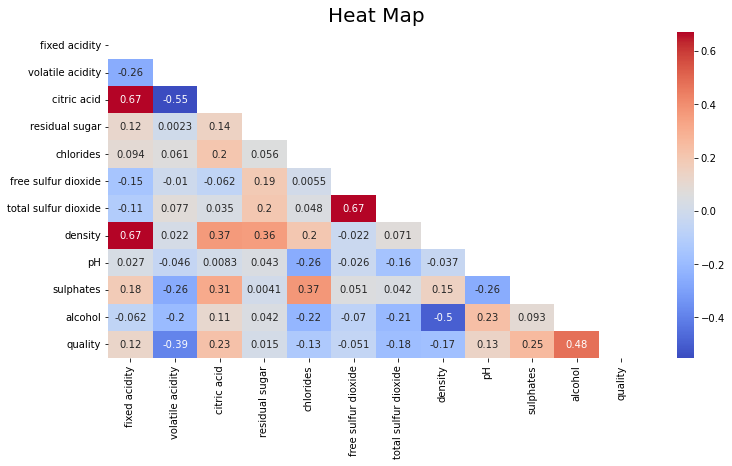

In [27]:
# You will not loose any information if you cut down one part of the heatmap along the diagonal

mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(data.corr(), cmap = "coolwarm", annot = True, mask = mask)
heatmap.set_title("Heat Map", fontsize = 20, pad = 10)
plt.show()

### Observation 

The data in red columns  is highly correlated while the blue column is less correlated , you can say the correlation is increasing from blue to red.

## Now the basic Cleaning, EDA and feature Engineering is done , now Building the machine learning model.

### Good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

In [94]:
# Separating the data or data pre- processing

X = data[['residual sugar', 'alcohol', 'pH','volatile acidity', 'sulphates' ]]
y = data['quality']

In [95]:
data.quality.shape

(1596,)

In [96]:
y.shape

(1596,)

In [100]:
# import libraries
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [168]:
# Importing the required libraries for  regression models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
xtrain.shape , xtest.shape ,ytrain.shape  , ytest.shape # Training and testing data

((1276, 5), (320, 5), (1276,), (320,))

In [105]:
y_test = np.array(ytest)

# Applying different types of models for prediction

# Logistic Regression 

In [85]:
# Feature Scaling

norm = MinMaxScaler()

norm_fit = norm.fit(xtrain)

xtrain = norm_fit.transform(xtrain)
xtest = norm_fit.transform(xtest)

In [106]:
# Importing required libraries for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [107]:
#Using Logistic Regression Algorithm to the Training Set
import warnings
log = LogisticRegression(random_state = 0)
logistic = log.fit(xtrain, ytrain)
print(logistic)
print('Model accuracy on the training data---')
print('Logistic Regression Training Accuracy:', log.score(xtrain, ytrain))

LogisticRegression(random_state=0)
Model accuracy on the training data---
Logistic Regression Training Accuracy: 0.5587774294670846


C:\Users\hp\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
prediction1 = logistic.predict(xtest)
#print(prediction1)

In [113]:
prediction1.shape

(320,)

In [114]:
ytest.shape

(320,)

In [115]:
comparison = pd.DataFrame({'Actual':ytest, 'Predicted': prediction1})
comparison

,Actual,Predicted
915,6.0,6.0
1033,6.0,5.0
1002,7.0,6.0
490,6.0,5.0
1195,6.0,5.0
...,...,...
796,5.0,5.0
894,6.0,5.0
1323,7.0,6.0
707,5.0,6.0


In [173]:
accuracy_score(y_test, prediction1) # Accuracy score of the model logistic model

0.578125

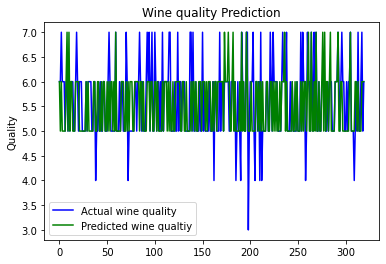

In [130]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction1 , color = 'green', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [116]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(ytest, prediction1)
print("Validation MAE for Decision Tree Model: {}".format(mae1))

Validation MAE for Decision Tree Model: 0.44375


### Observation 

The calculated accuracy of the LogisticRegression model is 0.5587774294670846.

The calculated error of the LogisticRegression model is 0.44375.

# Decision Tree Classifier

In [141]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [142]:
#Using Decision Tree Classifier of tree class to use Decision Tree Algorithm

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(xtrain, ytrain)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [143]:
#print model accuracy on the training data.
print('Decision Tree Classifier Training Accuracy:', tree.score(xtrain, ytrain))

Decision Tree Classifier Training Accuracy: 0.9992163009404389


In [144]:
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [145]:
prediction2 = tree.predict(xtest)
#print(prediction2)

In [124]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction2})
comparison

,Actual,Predicted
0,6.0,7.0
1,6.0,6.0
2,7.0,7.0
3,6.0,6.0
4,6.0,6.0
...,...,...
315,5.0,6.0
316,6.0,6.0
317,7.0,7.0
318,5.0,6.0


In [174]:
accuracy_score(y_test, prediction2) # Accuracy score of the Decision Tree model 

0.603125

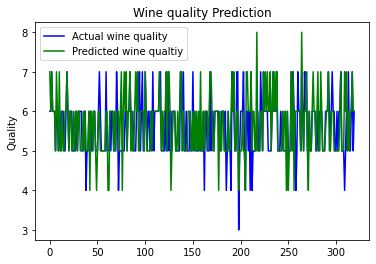

In [128]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction2 , color = 'green', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [129]:
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(ytest, prediction2)
print("Validation MAE for Decision Tree Model: {}".format(mae2))

Validation MAE for Decision Tree Model: 0.4578125


### Observation 

The calculated accuracy of the Decision Tree Classifier is 0.9992163009404389.

The calculated error of the Decision Tree Classifier is 0.4578125.

# Random Forest Model

In [131]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [136]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
forest = rf_model.fit(xtrain, ytrain)
print(forest)


RandomForestRegressor(random_state=1)


In [154]:
#print model accuracy on the training data.
print('Random forest model Training Accuracy:', forest.score(xtrain, ytrain))

Random forest model Training Accuracy: 0.9181583440322294


In [138]:
prediction3 = forest.predict(xtest)
#print(prediction3)

In [134]:
y_pred = forest[0].predict(xtest)

ytest.iloc[0],y_pred[0]

C:\Users\hp\anaconda4\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


(6.0, 7.0)

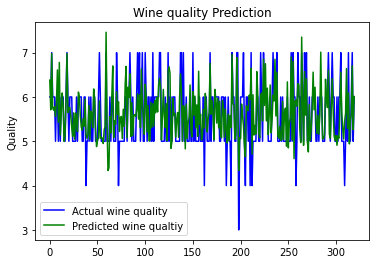

In [139]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction3 , color = 'green', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [161]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction3})
comparison

,Actual,Predicted
0,6.0,6.380
1,6.0,5.710
2,7.0,6.980
3,6.0,5.762
4,6.0,5.700
...,...,...
315,5.0,5.470
316,6.0,5.600
317,7.0,6.700
318,5.0,5.260


In [180]:
accuracy_score(y_test, y_pred) # Accuracy score of the Random Forest model

0.571875

In [148]:
from sklearn import metrics
print("Mabs error   : " + str(metrics.mean_absolute_error(ytest, y_pred)))
print("M sqrd error : " + str(metrics.mean_squared_error(ytest, y_pred)))
print("RMS error    : " + str(np.sqrt(metrics.mean_squared_error(ytest, y_pred))))

Mabs error   : 0.496875
M sqrd error : 0.653125
RMS error    : 0.8081614937622307


In [178]:
from sklearn import metrics
print("Mabs error   : " + str(metrics.mean_absolute_error(ytest, prediction3)))
print("M sqrd error : " + str(metrics.mean_squared_error(ytest, prediction3)))
print("RMS error    : " + str(np.sqrt(metrics.mean_squared_error(ytest, prediction3))))


# As you can see the differnce, Prediction2 is better than y_pred 

Mabs error   : 0.4244744791666667
M sqrd error : 0.32355228567708333
RMS error    : 0.5688165659306024


In [152]:
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_preds = forest.predict(xtest)
rf_val_mae = mean_absolute_error(ytest, rf_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.4244744791666667


### Observation 

The calculated accuracy of Random forest model is 0.9181583440322294.

The calculated error of theRandom forest model is 0.4244744791666667.

# Support Vector Machine algorithm

In [155]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error

In [156]:
#Using SVC method of svm class to use Kernel SVM Algorithm

# fit your model
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc = svc_rbf.fit(xtrain, ytrain)
print(svc)

SVC(random_state=0)


In [157]:
print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(xtrain, ytrain))

Support Vector Machine (RBF Classifier) Training Accuracy: 0.5658307210031348


In [159]:
prediction4 = svc.predict(xtest)
#print(prediction4)

In [162]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction4})
comparison

,Actual,Predicted
0,6.0,6.0
1,6.0,5.0
2,7.0,6.0
3,6.0,6.0
4,6.0,5.0
...,...,...
315,5.0,5.0
316,6.0,5.0
317,7.0,6.0
318,5.0,5.0


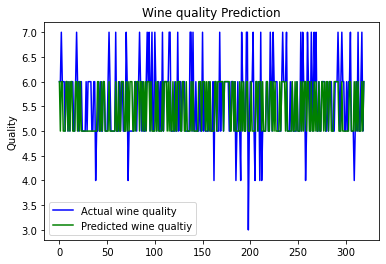

In [165]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction4 , color = 'green', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [181]:
accuracy_score(y_test, prediction4) # Accuracy score of the model SVM 

0.575

In [164]:
# Calculate the mean absolute error of your Random Forest model on the validation data

svc_val_mae = mean_absolute_error(ytest, svc_preds )

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.4244744791666667


### Observation 

The calculated accuracy of Support Vector Machine algorithm is 0.5658307210031348.

The calculated error of theSupport Vector Machine algorithm is 0.4244744791666667.

In [189]:
print()

## Conclusion

Order of the best model for wine quality predictions according to the applied Regression models and classifiers in ascending order is given below---

SVM < Logistic Regression < Decision Tree  < Random Forest model
0.42 < 0.44 < 0.45 < 0.46

SVM And Logistic Regression  are the best fitted  model here with a less mean absolute error and better prediction result,
Let's take a look again on them -----

In [166]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction4})
comparison

,Actual,Predicted
0,6.0,6.0
1,6.0,5.0
2,7.0,6.0
3,6.0,6.0
4,6.0,5.0
...,...,...
315,5.0,5.0
316,6.0,5.0
317,7.0,6.0
318,5.0,5.0


In [188]:
# Confusion matrix

print("The confusion matrix for checking the correct predicted values and wrong predicted values from the model---")
print()
print(confusion_matrix(ytest, prediction4, labels=np.unique(ytest)))

The confusion matrix for checking the correct predicted values and wrong predicted values from the model---

[[  0   0   1   0   0]
 [  0   0   6   4   0]
 [  0   0 112  32   0]
 [  0   0  54  72   0]
 [  0   0   6  33   0]]


In [192]:
print("The accuracy score of the model is --")
accuracy_score(y_test, prediction4) # Accuracy score of the model SVM 

The accuracy score of the model is --


0.575

### Hence, 
### It is verified that Good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.
